In [ ]:
# https://codegolf.stackexchange.com/a/39908

In [346]:
%pylab inline
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle
from itertools import product

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


In [6]:
regex = u"""^(?!.*(.).*\1)(?=M)((?=!7|!D|!a|!§|!¾|!Ö|!ù|!Ě|!į|!Ň|"C|"s|"t|"¡|"°|"»|"è|"ñ|"÷|"ķ|"ļ|"Œ|#W|#k|#l|#o|#q|#¶|#À|#Â|#Æ|#č|%!|%1|%O|%ÿ|%Ĕ|%Ğ|%Ī|%ĭ|&e|&q|&Õ|&æ|&ü|&đ|&Ĩ|'%|'`|'k|'¯|'É|'í|'þ|'ė|'Ğ|'ĩ|'Ĳ|'ļ|'ł|,%|,'|,l|,ª|,®|,¸|,¹|,ã|,õ|,Ċ|,Ġ|,Ī|,İ|,Ņ|-U|-V|-»|-Ï|-Þ|-ì|0_|0u|0°|0Ġ|0İ|0ł|1#|1-|1g|1å|1é|1ą|1Ļ|1ń|2B|2O|2¬|2ë|2ò|2õ|2Ğ|2ĩ|2į|2Ĳ|2ļ|3d|3²|3Ï|3Þ|3ß|3ç|3ø|3ĉ|3ķ|3ĸ|3Ŀ|4c|4£|4ß|4ã|4Ċ|4ģ|4Ĩ|4ő|4Œ|5&|5Q|5û|5Ā|5ě|5ĩ|6ú|6Ķ|6Ł|7Q|7V|7e|7²|7Á|7Þ|7à|7đ|7Ġ|7ĵ|8w|8¯|8¾|8ņ|8ő|9H|9Y|9i|:6|:s|:¬|:ð|:ü|:Ĉ|:Ċ|:Ĵ|:ĸ|:Ŀ|;X|;®|;¯|;²|;¸|;Ó|;à|;ĥ|;Œ|<-|<t|<å|<ø|<Į|<Ľ|<ō|=&|=l|=¨|=Á|=Ý|=Č|=Ĩ|=Ń|>-|>±|>¸|>Ä|>à|>ð|>ó|>Ī|@B|@F|@_|@³|@´|@Ó|@Ü|@ã|@û|@Ğ|@ğ|@Ĭ|@İ|@Ŀ|A5|AV|A_|Ax|A¹|AÅ|AĞ|AĶ|Aņ|Aō|B¼|BÂ|Bä|Bç|BĊ|Bį|Bİ|BĻ|BŅ|C1|C<|CG|Cy|C~|C¼|Cì|Cù|Cō|DT|DU|Dc|Dj|D¤|DÂ|DÑ|DĀ|Dİ|E,|E¬|E¼|E×|Eā|Eė|Eń|FZ|Ft|F»|F¿|FÈ|FØ|Fç|Fì|Fć|FĬ|Fı|FŅ|Gj|Gl|Gv|G¯|Gâ|Gï|GĖ|Gę|GĦ|Gĭ|H8|HB|HS|Hu|H¥|HÃ|HÌ|Hø|HĆ|HĒ|HĬ|Hĭ|I=|It|I©|Iæ|IĿ|Iō|J1|J3|J5|JQ|JÉ|JÔ|J×|Jă|JĲ|K-|KP|KÄ|Kî|Kā|KĐ|Kġ|KĨ|KĴ|L!|LÐ|Lá|LĚ|LĠ|M5|M¿|MÅ|Må|MĈ|MŊ|N,|N2|N5|NB|Nh|NÂ|NØ|NÜ|NĖ|Nĝ|NŃ|O;|Of|O¯|O¸|Oå|OĈ|Oď|Oē|OĲ|P7|PQ|Pp|P£|Pđ|PĴ|Pŀ|Q7|QR|Q¥|QÝ|Qî|Qī|Qĸ|Qŀ|Qő|R0|RA|RI|RN|R¥|R¼|Rö|Rû|RĬ|RĮ|RŎ|S;|SC|ST|Sd|Sy|S§|TX|Td|Tw|Tª|T¿|Tõ|U0|U:|UÊ|Uĉ|Uę|UĢ|UĦ|Uį|UĶ|Uň|V:|Vq|Vs|V¦|VÂ|Vó|Vþ|Wh|WÅ|WÉ|Wê|Wô|Wģ|Wň|X:|XI|XS|X`|Xâ|Xċ|Xė|XĠ|Xģ|Y"|YX|Yb|Yn|Yo|Y£|Y§|YÌ|YÎ|YÚ|Yá|Yă|YĜ|Yĥ|YĿ|Yŉ|Z6|Z:|Z;|Z¶|Zå|Zæ|Zċ|Zĺ|ZŊ|_,|_-|_c|_g|_à|_ĉ|_Ħ|_ł|`I|`z|`ð|`ă|`Ĳ|`ĳ|a4|a9|aF|a½|aä|añ|aď|aĝ|aĸ|b&|b7|b¸|bÝ|bë|bĺ|bņ|bŊ|c&|cP|cr|cÄ|cÑ|cÖ|cČ|cę|cĩ|cĲ|cķ|cĿ|d"|dI|d¥|d¦|dä|dģ|eK|e²|eý|eą|eČ|eĔ|eĲ|eĶ|eń|fM|fm|f¥|fÇ|fÒ|fæ|fì|fć|fě|fĝ|g!|gN|gx|gz|gÍ|gĚ|gĞ|h"|h¬|h¶|hä|hì|hï|hĆ|hņ|hŋ|hŏ|i'|i9|i¢|i¤|iÓ|iÖ|iā|iĕ|iĝ|iį|iĶ|jH|jT|j£|jµ|j·|jø|jĸ|jŐ|k0|k2|kA|k~|k¨|k½|kÙ|l&|lX|lc|ln|l£|l¥|lµ|lÃ|lå|lé|lĩ|lŌ|lŒ|m-|mW|mÐ|mĘ|mĮ|mĸ|n!|n2|nJ|nU|n¬|n½|nĆ|nĒ|nĔ|nĭ|nŇ|o5|o<|oD|oM|oÖ|oĂ|ps|pz|pº|pê|pĢ|pĥ|pĲ|qK|qa|q§|qÛ|qç|qý|qă|qĒ|qĴ|qĶ|qń|rA|re|rj|r§|r«|r¿|rÃ|rß|rò|rĔ|rĖ|rĢ|rķ|sD|sc|sÍ|sĀ|tT|tW|ta|t£|t¯|t±|tÊ|tÑ|tĚ|tļ|uV|ua|ub|uf|u¦|u´|u»|u¾|uË|uØ|uĞ|uĪ|uĹ|v:|vi|vw|v§|v½|vÄ|vÈ|vÌ|vù|vĮ|vļ|vŉ|vŎ|w!|w0|wZ|wg|wÞ|wæ|wò|wù|wĥ|wħ|wŎ|xD|x©|x®|xá|xû|xģ|xľ|xł|yC|ya|yr|y²|yÉ|yò|yĆ|yĠ|yĵ|yŒ|zM|zi|z¯|zø|zú|zć|zđ|~5|~Y|~¨|~º|~Û|~å|~ê|~ô|~ü|~ą|~ĥ|~Ī|~İ|~Ľ|~ō|¡J|¡±|¡¼|¡Ê|¡Ë|¡Ñ|¡ã|¡Ă|¡Ġ|¡Ĩ|¡ī|¡Œ|¢@|¢G|¢±|¢º|¢ç|¢Đ|¢İ|¢Ŀ|£F|£e|£Þ|£ä|£Ĵ|¤P|¤p|¤¯|¤µ|¤þ|¤ď|¤Ģ|¤ī|¥Z|¥¤|¥È|¥Ñ|¥û|¥Ď|¦T|¦Y|¦Z|¦a|¦b|¦e|¦q|¦r|¦¡|¦³|¦ĩ|¦Ĳ|¦ĺ|§b|§n|§w|§¿|§Ç|§Đ|¨3|¨Ã|¨Ë|¨Î|¨ë|¨÷|¨Č|¨ġ|¨Ī|¨Ĺ|¨ł|¨Œ|©I|©Z|©Ý|©ë|©ü|©ġ|©ŋ|ªP|ªo|ªr|ª¨|ª¯|ª²|ª¾|ªÇ|ªÔ|ªÙ|ªĉ|«K|«p|«£|«¨|«©|«¬|«®|«Õ|«Þ|«ß|«ö|«Đ|¬!|¬j|¬ª|¬¼|¬À|¬Ã|¬Ì|¬ú|¬ő|®#|®´|®É|®č|®đ|®ī|®ŉ|¯9|¯g|¯n|¯¹|¯È|¯Ē|¯ę|¯ġ|°N|°d|°k|°m|°s|°²|°È|°Î|°ê|°ó|°ŉ|±%|±R|±Y|±r|±æ|±Ŀ|±ń|²D|²H|²U|²×|²ã|²ä|²ç|²ą|²ħ|³`|³Ë|³ã|³ë|³ò|³ô|³ø|³Ċ|³Ĥ|³Ŀ|´~|´§|´Ê|´è|´Ķ|´Ŏ|µ:|µC|µ¢|µØ|µó|µĠ|µģ|µĤ|¶!|¶0|¶7|¶Y|¶¤|¶À|¶Ö|¶Ħ|¶ő|·p|·Á|·Ç|·ë|·î|·Ļ|·Ŋ|¸X|¸Z|¸¦|¸÷|¸ú|¸Đ|¸ĝ|¹,|¹>|¹M|¹Z|¹a|¹¢|¹Ì|¹×|¹Ø|¹þ|¹ĉ|¹Ĩ|º>|ºj|ºá|ºç|ºý|ºć|»2|»c|»°|»Ä|»ñ|»Ġ|»Ŋ|¼3|¼F|¼c|¼d|¼x|¼y|¼Ä|¼É|¼û|¼Č|¼ē|¼Ĩ|¼Ĭ|¼Ĵ|¼Ĺ|½k|½Ø|½ø|½ħ|¾2|¾:|¾L|¾¿|¾Á|¾ñ|¾ô|¾÷|¾đ|¾ĥ|¾Ń|¿D|¿«|¿ö|¿ø|¿Ĕ|¿ę|¿Ļ|¿ō|À3|ÀW|À°|ÀÆ|Àđ|ÀĘ|ÀĞ|Àģ|Àİ|Á§|Áé|Áõ|ÁĜ|Áĝ|ÁĪ|Áŉ|Â&|ÂB|ÂM|Â¿|Âø|Âħ|Âĺ|ÂĻ|ÂŁ|Âŉ|Ã`|Ãt|Ã¢|Ã©|ÃĆ|ÃĖ|Ãĥ|Ãĩ|Ä_|Ä¥|ÄÌ|ÄÞ|Äð|ÄĆ|Äİ|ÄŁ|Å@|ÅY|Å«|ÅĄ|Åı|Åĸ|Æ;|ÆK|Æv|Æµ|Æ¹|Æ½|ÆÇ|ÆÛ|Æõ|Æü|ÆĆ|ÆĤ|Çd|Çº|ÇĔ|Çě|Çģ|ÇĶ|ÇĽ|Èd|Èz|È~|È´|È½|ÈÂ|Èæ|Èõ|ÈŅ|ÉH|ÉO|ÉÌ|Éï|ÉČ|Éę|ÉĬ|Éĭ|ÉĴ|ÉŎ|Ê%|Ê6|ÊI|Êk|Êy|Ê³|ÊÁ|Êñ|Êą|ÊŃ|Ë!|ËH|Ëh|Ëº|Ë»|ËÆ|Ëğ|ËŌ|Ì3|Ì7|ÌG|Ìp|Ì«|Ìè|Ìï|ÌĮ|ÌŎ|ÍZ|Íd|Í©|ÍÖ|Íá|Íê|Íø|Íā|ÍŊ|Î-|Î_|ÎÊ|Îæ|Îó|Îù|ÎĀ|ÎĐ|Îġ|Îĭ|ÎŇ|Ï"|Ï5|Ï7|ÏA|ÏH|Ïl|Ï±|Ï¹|ÏÈ|ÏØ|ÏÚ|ÏÛ|ÏĻ|Ïŉ|ÐR|Ð·|ÐÀ|ÐÓ|ÐĒ|Ðě|ÐĶ|Ðľ|Ñ©|Ñµ|ÑÅ|ÑÈ|Ñŉ|ÒV|ÒÇ|Òĉ|Òħ|ÒŃ|Ó2|ÓD|ÓÎ|Óç|Ó÷|Óù|ÓĈ|Óķ|ÔE|ÔJ|Ôf|Ôy|ÔÆ|ÔÞ|Ôâ|ÔĂ|ÔĨ|Õ3|ÕG|Õh|Õ¹|ÕÁ|ÕÐ|Õÿ|Õğ|Õī|Ö7|ÖB|Öª|Ö¼|Öÿ|Öħ|Öĳ|×6|×>|×f|×¢|×µ|×·|×Â|×Ê|×Ñ|×ã|ØG|Ø¯|ØÄ|ØÊ|Øé|Øë|ØĊ|ØŇ|ØŐ|Øő|Ù:|Ùh|Ùx|Ù²|Ùč|Ùē|Ùę|Ùě|ÙĨ|ÙŇ|ÚE|Úq|Ú®|ÚÄ|ÚÒ|ÚÜ|Úä|Úí|Úı|Úķ|Û'|ÛW|Ûo|Ût|ÛÓ|Ûô|Ûõ|Ûû|Ûŉ|Ûŋ|Ü!|ÜJ|ÜÆ|ÜŐ|ÝR|Ýg|Ýq|Ýu|ÝÜ|Ýß|Ýð|Ýø|Ýč|ÝĶ|Ýŉ|Þº|ÞÝ|ÞĂ|Þą|Þć|ÞĠ|ÞĨ|ßu|ßÀ|ßė|à4|àS|à`|àk|à§|àé|àø|àĊ|àę|àģ|àĬ|á3|á£|á¶|áÄ|áÏ|áÑ|áâ|áü|áČ|áĽ|áņ|áŌ|â#|âY|â£|âº|âÓ|âġ|âĭ|âı|âŐ|âŒ|ã,|ã1|ã7|ã8|ãé|ãĭ|ä3|ä6|äN|ä¢|ä©|ä¬|äÏ|äĖ|äį|äŏ|åN|å¡|å¾|åØ|åë|åû|åč|åě|æ7|æT|æt|æ¸|æá|æï|æā|æĳ|ç2|çA|çJ|çl|ç¥|ç¬|çĝ|çĸ|èl|èq|èÓ|èÙ|èČ|èĖ|èĩ|èņ|èŉ|èő|éV|éZ|é®|é´|éí|éó|éû|éą|éě|éĭ|éŃ|ê5|êv|ê«|ê¶|êº|êÃ|êÔ|êİ|ëB|ëb|ë¤|ë¨|ëÎ|ëę|ëĞ|ì#|ì,|ì=|ì>|ìQ|ìS|ìV|ìº|ìā|ìġ|íJ|íV|í~|í¶|íò|íø|íă|íė|íĭ|î<|î=|îD|îR|îµ|îÚ|îÛ|îå|îê|îþ|îĒ|îĜ|îğ|ï%|ï,|ïa|ïu|ïÀ|ïÁ|ïá|ïĄ|ïą|ïċ|ïġ|ïĿ|ïŁ|ïŌ|ð6|ðE|ðp|ð¬|ðÞ|ðä|ðĚ|ðğ|ðļ|ñ1|ñ2|ñX|ñi|ñá|ñú|ñû|ñü|ñį|ñŊ|òB|ò«|ò¿|òÝ|òê|òď|ó5|óÄ|óÇ|óÈ|óÓ|óÕ|óĨ|óļ|ô4|ôh|ôÖ|ôî|ôþ|ôğ|ôŅ|õo|õ¢|õ¶|õÆ|õÓ|õä|õČ|õĕ|õģ|ö7|ö@|ön|ö¢|öÉ|öÒ|öÛ|öâ|öĝ|÷-|÷J|÷p|÷Ò|÷Ģ|÷ĭ|÷ı|÷ŉ|ø,|øo|ø¥|øÆ|øç|øè|øù|øĤ|øĥ|øħ|øň|ù7|ù9|ùs|ùu|ù¹|ùÍ|ùĆ|ùę|ùě|ùĹ|úG|úÅ|úÕ|úÖ|úÜ|úã|úç|úĂ|úĦ|û%|û;|ûR|ûh|ûu|ûz|û´|ûÐ|ûë|ûń|ûŊ|ü_|ü²|üê|üē|üğ|üł|üŅ|ý8|ý¨|ý©|ýÍ|ýÜ|ýĄ|ýċ|ýĩ|ýı|ýĲ|ýĸ|ýł|ýň|ýŎ|þ;|þD|þJ|þT|þr|þ·|þè|þĆ|ÿO|ÿÒ|ÿæ|ÿð|ÿć|ÿğ|ÿŇ|ĀA|ĀR|Ā_|Āv|Āá|ĀĘ|Āģ|Āİ|ā6|āM|ā¸|āä|āĮ|ĂX|ĂÁ|ĂÕ|ĂĚ|Ăķ|ĂĹ|ă"|ă°|ă¸|ăÉ|ăĆ|ăĚ|ăğ|ăĸ|ăĻ|ăŃ|ĄG|ĄJ|ĄK|Ą`|Ąc|Ąd|Ąg|Ąl|Ą³|ĄÄ|ĄÊ|ĄÌ|Ąú|ĄĽ|ą;|ąL|ąc|ąd|ąo|ąr|ą®|ą±|ąÄ|ąÅ|ąÇ|ąÍ|ą×|ąĈ|ąĎ|ąĐ|ąĩ|ąŌ|Ć´|Ć¸|Ć¼|ĆÑ|ĆØ|Ćí|ĆĊ|Ćņ|ĆŌ|ć4|ćx|ćy|ć¦|ć«|ćù|ćŃ|Ĉ&|Ĉ8|ĈE|ĈK|Ĉn|Ĉ¨|Ĉà|Ĉé|Ĉû|Ĉđ|Ĉĥ|ĈĪ|Ĉī|Ĉņ|ĉ@|ĉa|ĉÇ|ĉ×|ĉĩ|ĉň|Ċ#|Ċb|Ċt|Ċ»|ĊÁ|ĊÚ|Ċä|Ċÿ|Ċĝ|Ċĩ|Ċį|ċ'|ċD|ċ¶|ċÖ|ċê|ċþ|ċğ|ċņ|ČM|Čs|Č£|ČĨ|Čį|č±|čÖ|čè|čć|čğ|čń|čŉ|Ď`|Ď¡|Ď·|Ď¾|Ď¿|Ďą|Ďĳ|Ďŋ|ď"|ď5|ď8|ď=|ďD|ďs|ďØ|ďÚ|ďí|ďġ|ďĩ|ďļ|ĐF|ĐS|Đg|Đk|Đn|Đv|Đ~|ĐÖ|ĐÚ|ĐÜ|Đâ|ĐĞ|đA|đf|đ´|đ¸|đ¿|đÈ|đÖ|đà|đĽ|đŀ|đŌ|Ē%|ĒH|ĒÍ|ĒĹ|ĒĻ|ĒŁ|ĒŃ|ĒŇ|ē;|ēG|ēa|ēe|ēq|ē¶|ē»|ē÷|ēň|Ĕ"|Ĕ4|ĔÃ|Ĕý|Ĕą|ĔĆ|ĔĚ|ĔĞ|ĔĨ|ĕ"|ĕm|ĕw|ĕ¨|ĕ®|ĕÌ|ĕÑ|ĕĤ|Ė#|ĖR|Ėe|Ėu|Ė~|Ė¯|Ėĩ|ĖĬ|ėH|ė¹|ėö|ėú|ėÿ|ėĨ|Ęs|ĘÝ|Ęą|ĘČ|Ęĝ|Ęī|Ęĺ|Ęŉ|ęA|ęk|ęp|ę»|ęè|ęą|ęĐ|ęĨ|Ě'|Ě9|Ěe|Ěm|Ěo|Ě£|Ěª|Ě¾|Ěå|Ěë|Ěă|ĚĎ|ĚĜ|ĚĞ|ěP|ěx|ěê|ěî|ěö|ěĂ|ěĤ|ěĭ|ěļ|Ĝ%|ĜÜ|ĜĽ|ĝJ|ĝh|ĝ¹|ĝÃ|ĝÈ|ĝĖ|ĝĞ|ĝŇ|ĝŒ|Ğ&|Ğe|Ğs|ĞÖ|ğX|ğ²|ğ´|ğ¼|ğÙ|ğò|ğĂ|ğđ|ğĕ|ğĨ|ğĬ|ĠB|Ġc|Ġµ|ĠÈ|Ġè|Ġì|Ġđ|Ġě|ġ5|ġ<|ġH|ġm|ġº|ġÒ|ġü|ġă|ġĶ|ġŀ|Ģ;|Ģ¤|Ģ«|ĢÍ|ĢØ|Ģù|Ģă|ĢĐ|Ģđ|ģ-|ģL|ģ«|ģë|ģþ|ģċ|ģČ|ģĨ|ģĻ|Ĥf|Ĥª|Ĥñ|ĥM|ĥN|ĥU|ĥf|ĥz|ĥ»|ĥõ|ĥň|Ħ`|Ħj|Ħu|Ħ°|Ħ´|ĦÁ|ĦÈ|ĦÕ|Ħæ|ĦĤ|ħ4|ħp|ħ¡|ħ¦|ħ¶|ħß|ħç|ħĴ|ħĵ|ĨC|Ĩ°|ĨÂ|ĨÌ|Ĩç|Ĩõ|ĨĔ|Ĩŏ|ĩ8|ĩl|ĩt|ĩw|ĩċ|ĩđ|ĩĥ|ĩī|ĩŅ|Ī4|Ī9|ĪP|Īz|Ī±|ĪÅ|ĪÈ|ĪÝ|Īä|Īđ|ĪĦ|ĪĬ|ĪĽ|īb|īl|ī¥|ī¦|īÌ|īì|īČ|īĎ|īĐ|Ĭ#|Ĭ4|ĬF|Ĭ¤|Ĭê|Ĭí|Ĭû|Ĭĝ|ĬŌ|ĭ1|ĭK|ĭL|ĭz|ĭ¡|ĭ¯|ĭÌ|ĭâ|ĭĘ|ĭě|ĭĺ|ĮM|ĮR|Įd|Įx|Į¤|ĮÃ|ĮË|ĮÚ|Įå|ĮĤ|ĮĦ|Įī|į&|įD|įI|į¥|į«|įÉ|įÕ|įÛ|įĉ|įđ|įĒ|İQ|İi|İ¬|İ¾|İÕ|İ×|İĄ|İĬ|İľ|ı4|ıa|ıd|ıe|ıf|ı¡|ıĐ|ıĖ|ıĲ|Ĳ:|ĲT|ĲU|Ĳm|ĲÛ|Ĳķ|ĲŎ|ĳ0|ĳb|ĳ¢|ĳ«|ĳé|ĳí|ĳĎ|ĳĘ|ĳķ|Ĵ#|ĴF|ĴG|Ĵµ|Ĵ¹|ĴÈ|ĴÏ|Ĵý|Ĵþ|ĴĖ|ĵ8|ĵE|ĵK|ĵ¦|ĵ±|ĵÙ|ĵó|ĵõ|ĵĹ|Ķ6|ĶE|Ķl|Ķm|Ķ£|Ķ²|ĶÅ|Ķ÷|ĶĀ|Ķă|ĶĆ|ķv|ķ«|ķå|ķĢ|ķŌ|ĸ9|ĸH|ĸ¼|ĸè|ĸý|ĸĕ|ĸį|Ĺ§|Ĺ·|ĹÇ|ĹÈ|Ĺġ|Ĺĩ|ĺ#|ĺ6|ĺp|ĺr|ĺu|ĺæ|ĺí|ĺĖ|Ļ@|ĻI|Ļn|Ļ£|Ļ¶|ĻÂ|Ļú|ĻĮ|ĻŎ|ļ=|ļK|ļO|ļ_|ļ´|ļÀ|ļÄ|ļó|Ľ>|ĽC|ĽD|ĽG|ĽZ|Ľk|Ľr|Ľ¼|ĽÌ|Ľâ|ĽĮ|ĽŒ|ľf|ľÙ|ľÞ|ľĂ|ľī|ľł|ľņ|ĿÊ|Ŀď|Ŀđ|ĿĚ|Ŀĵ|ĿĻ|Ŀŏ|ŀC|ŀM|ŀ®|ŀà|ŀð|ŀõ|ŀČ|ŁE|ŁÁ|ŁÄ|Łõ|Łķ|ŁĿ|ł4|łG|łu|ł¬|łÏ|łò|łČ|łč|łĐ|łŌ|Ń6|Ń¿|ŃÅ|ŃË|ŃÚ|Ńü|Ńě|Ńņ|ń4|ń<|ńE|ńx|ń»|ńÄ|ńď|ńĺ|Ņ,|ŅP|Ņe|Ņn|Ņo|Ņ©|Ņ¯|Ņ½|ŅÛ|ŅĂ|ņî|ņð|ņô|ņĈ|ņī|ņĬ|ņı|Ň8|Ň:|ŇD|ŇT|Ň_|Ňd|Ňu|Ňª|Ňā|Ňć|ŇĈ|Ňň|ňK|ňL|ň¬|ňÇ|ňÏ|ňþ|ňĐ|ňĠ|ňŐ|ŉQ|ŉ_|ŉf|ŉÉ|ŉË|ŉĨ|ŉŃ|Ŋ0|ŊM|ŊW|ŊÔ|ŊĠ|ŋC|ŋH|ŋK|ŋÍ|ŋÒ|ŋØ|ŋÞ|ŋı|ŋĹ|Ō,|Ōl|Ō³|Ōò|Ōā|ŌĖ|ŌĚ|ŌĬ|ŌĮ|Ōĸ|ŌŒ|ōJ|ō¿|ōÀ|ōÝ|ōŉ|Ŏ8|Ŏ;|ŎQ|ŎV|Ŏ§|ŎÄ|ŎÏ|ŎĎ|ŎŇ|ŏ=|ŏD|ŏV|ŏ¹|ŏÈ|ŏÒ|ŏč|ŏĐ|ŏī|ŏĿ|ŏŉ|Ő2|Ő<|ŐC|ŐX|Őg|Ől|Őp|Ő®|Őİ|ő8|ő¹|őÀ|őó|őć|őĊ|őĖ|őĦ|őķ|őĸ|őŀ|ŒB|Œv|ŒÀ|ŒÒ|Œā|Œĉ|Œė|ŒĜ|ŒĦ|Œķ|Œľ).){255}Ň$"""

In [42]:
graphdef = regex[22:-9]

In [43]:
graphit = iter(graphdef)
edges = []
while True:
    a = graphit.next()
    b = graphit.next()
    _ = graphit.next()
    edges.append((a, b))

StopIteration: 

In [57]:
g = nx.DiGraph(edges)
g.number_of_nodes()

256

In [119]:
source_v = u'M'
target_v = u'Ň'

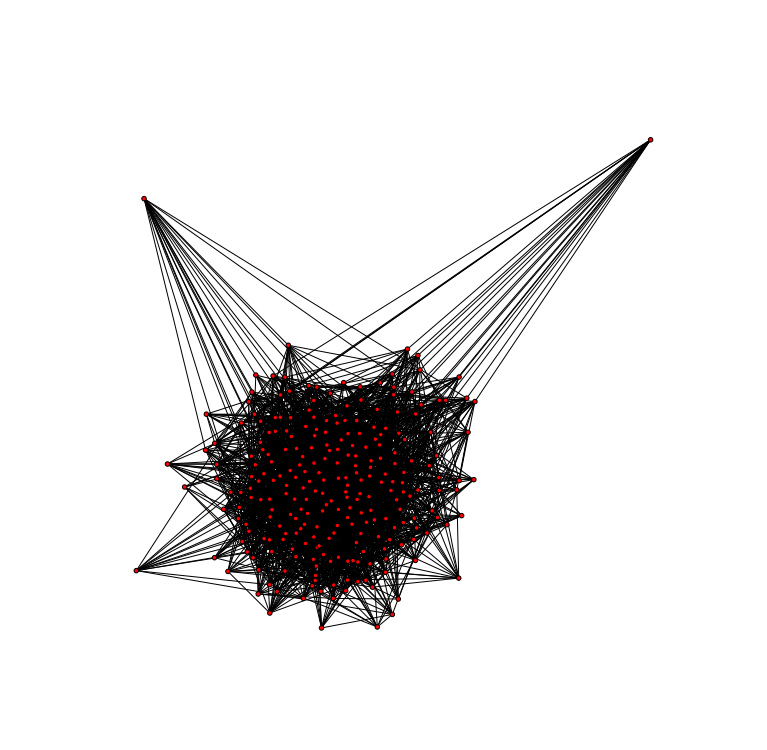

In [97]:
figure(figsize=(10,10))
pos = nx.spring_layout(g)
nx.draw(g.to_undirected(), pos, node_size=20)

In [99]:
nx.shortest_path(g, source=u'M', target=u'Ň')

[u'M', u'\u0108', u'n', u'\u0147']

In [180]:
def random_walk(g, source_v=source_v, target_v=target_v):
    visited = [source_v]
    while len(visited) < g.number_of_nodes() - 1:
        neigh = g.neighbors(visited[-1])
        shuffle(neigh)
        for next_v in neigh:
            if next_v not in visited and next_v != target_v:
                visited.append(next_v)
                break
        else:
            break
    if target_v in neigh:
        visited.append(target_v)
        return visited
    else:
        return None

In [256]:
random_walk(g)

[u'M',
 u'\xbf',
 u'\u014d',
 u'\xdd',
 u'\u0149',
 u'\u0128',
 u'\xf5',
 u'\u0123',
 u'-',
 u'U',
 u'\u0136',
 u'E',
 u'\u0101',
 u'6',
 u'\u0141',
 u'\u013f',
 u'\u014f',
 u'\xb9',
 u'Z',
 u':',
 u'\u0138',
 u'\xfd',
 u'\u0142',
 u'\xf2',
 u'\u010f',
 u'\u0121',
 u'\xba',
 u'\xe7',
 u'\xac',
 u'\xc3',
 u'\u0129',
 u'\u010b',
 u'\xea',
 u'\xab',
 u'\xa8',
 u'3',
 u'\xf8',
 u'\xf9',
 u'u',
 u'\xb4',
 u'\xe8',
 u'\u0116',
 u'e',
 u'K',
 u'\xc4',
 u'\xcc',
 u'\xef',
 u'%',
 u'\u012a',
 u'\u0126',
 u'\xe6',
 u'\xe1',
 u'\xcf',
 u'\xdb',
 u"'",
 u'\u011e',
 u'&',
 u'\xfc',
 u'\xb2',
 u'D',
 u'\xa4',
 u'p',
 u's',
 u'\xcd',
 u'd',
 u'"',
 u'\xf7',
 u'\u0122',
 u'\u0103',
 u'\u0106',
 u'\xed',
 u'J',
 u'\xd4',
 u'\xde',
 u'\u0105',
 u'\u0108',
 u'\u0125',
 u'\xbb',
 u'\u014a',
 u'W',
 u'h',
 u'\xb6',
 u'7',
 u'\u0111',
 u'f',
 u'\u011b',
 u'\xee',
 u'\xda',
 u'\u0131',
 u'a',
 u'\xe4',
 u'\u012f',
 u'\u0112',
 u'\u0143',
 u'\xc5',
 u'\u0104',
 u'g',
 u'\u011a',
 u'\xa3',
 u'\u0134',
 u'\xc8'

In [263]:
def extend(g, path):
    added = []
    for a, b in zip(path, path[1:]):
        for x in g.nodes_iter():
            if g.has_edge(a, x) and g.has_edge(x, b) and x not in path and x not in added:
                added.append(x)
                break
    return added

In [266]:
len(extend(g, w)) + len(w)

163

In [295]:
best = 0
for i in range(100000):
    path = random_walk(g)
    if path is None:
        continue
    extended = extend(g, path)
    nodes = len(path) + len(extended)
    if nodes > best:
        best = nodes
        print best
        bestpath = path

190
200
202
210
219
222
229
232


In [315]:
def get_extended(g, path):
    e = []
    for a, b in zip(path, path[1:]):
        e.append(a)
        for x in g.nodes_iter():
            if g.has_edge(a, x) and g.has_edge(x, b) and x not in e and x not in path:
                e.append(x)
                break
    e.append(path[-1])
    return e

In [370]:
path232 = get_extended(g, bestpath)

In [380]:
def get_super_duper_puper_extended(g, path):
    rem = set(g.nodes_iter()) - set(path)
    e = []
    for a, b in zip(path, path[1:]):
        e.append(a)
        for x, y, z, t in product(rem, rem, rem, rem):
            if g.has_edge(a, x) and g.has_edge(x, y) and g.has_edge(y, z) and g.has_edge(z, t) and g.has_edge(t, b):
                e.append(x)
                e.append(y)
                e.append(z)
                e.append(t)
                rem.remove(x)
                rem.remove(y)
                rem.remove(z)
                rem.remove(t)
                break
            if g.has_edge(a, x) and g.has_edge(x, y) and g.has_edge(y, z) and g.has_edge(z, b):
                e.append(x)
                e.append(y)
                e.append(z)
                rem.remove(x)
                rem.remove(y)
                rem.remove(z)
                break
            if g.has_edge(a, x) and g.has_edge(x, y) and g.has_edge(y, b):
                e.append(x)
                e.append(y)
                rem.remove(x)
                rem.remove(y)
                break
    e.append(path[-1])
    return e

In [381]:
superpath = get_super_duper_puper_extended(g, path232)
len(superpath)

239

In [460]:
def smart_extend(g, path):
    rem = set(g.nodes_iter()) - set(path)
    for todo in rem:
        inputs = [path.index(v[0]) for v in g.in_edges(todo) if v[0] in path]
        outputs = [path.index(v[1]) for v in g.out_edges(todo) if v[1] in path]
        for inp, outp in product(inputs, outputs):
            if outp < inp + 1:
                continue
            jump_in = inp + 1
            jump_out = outp - 1
            for jump_start in range(outp, len(path) - 1):
                if g.has_edge(path[jump_start], path[jump_in]) and g.has_edge(path[jump_out], path[jump_start + 1]):
                    newpath = path[:inp + 1]
                    newpath.append(todo)
                    newpath += path[outp:jump_start+1]
                    newpath += path[jump_in:jump_out+1]
                    newpath += path[jump_start+1:]
                    return newpath
    return path

240

In [461]:
uberpath = superpath
while True:
    newpath = smart_extend(g, uberpath)
    if newpath is uberpath:
        break
    uberpath = newpath
    print len(uberpath)

240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


In [473]:
ans = u''.join(uberpath)
print ans

M5Qőĸ¼ĴþĆ´ÊyĠèlŒvùuĹĩŅÛûzi9H¥Ď·î=&đÈÂŁÁĜ%O¸¦Zĺ#¶YĿĵKġĶĀRönJ3ĉňLáĽ>Ī±rjŐ2õĕĤfmÐěêºýÜÆüłòďļóÄðEń4£Fćx®čŉ_cķĢ¤īìS§¿ĔĚªPŀC<Įå¾÷ĭĘÝøoÖĳéíăÉę»ñŊÔâÓĈ8ņôğÙēqa½k~¨Î-ÏÚıĲTwĥU0İľÞĨçAĞeČįÕ¹×µ¢GĖĬĝhïĄÌpsDÑ©ŋØëb7²ħßėÿÒŃËŌ³ĊäŏV:¬Ã`IōÀ°N,ã1ąÇd"¡ĂXċ'¯ĒÍā6úĦætWÅ@BĻŎ;àģ«Đg!Ň


In [471]:
import re
re.compile(regex).match(ans)

In [477]:
with open('ans.txt', 'w') as f:
    f.write(ans.encode('utf-8'))
